
# K-Means Clustering

[(8, 7), (19, 25), (2, 21), (10, 8), (21, 24), (5, 15), (10, 6), (15, 20), (7, 16), (7, 5), (16, 26), (7, 21), (6, 9), (18, 26), (6, 18), (5, 6), (21, 22), (2, 21), (8, 11), (19, 23), (1, 18), (5, 5), (15, 24), (5, 19), (6, 7), (21, 23), (6, 21), (11, 11), (19, 23), (4, 21)]


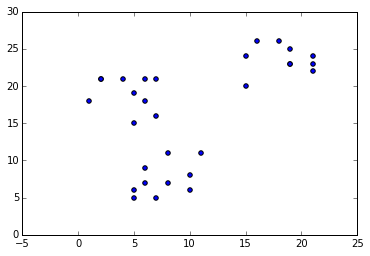

In [1]:
%matplotlib inline
import random
import matplotlib.pyplot as plt
import math

cents = [(5,5), (15,20), (1,15)]
points = []
for i in range(10):
    for c in cents:
        points.append(tuple([c[0]+random.randrange(7),c[1]+random.randrange(7)]))

print(points)

plt.scatter([x[0] for x in points],[x[1] for x in points])
plt.show()

In [2]:
k = 3

def chooseCentroids(k,points):
    centroids = random.sample(points,k)
    print(centroids)

    cluster_keeper = {}
    for c in centroids:
        cluster_keeper[c] = []
    return cluster_keeper

def edist(p1,p2):
    tot = 0
    for i in range(len(p1)):
        diff = (p1[i]-p2[i])**2
        tot = tot + diff
    return math.sqrt(tot)

def createClusters(k, points, ck, it):
    for i in range(it):
        for p in points:
            minC = None
            minD = 99999
            for c in ck:
                dist = edist(c,p)
                if dist < minD:
                    minC = c
                    minD = dist
            ck[minC].append(p)
        newck = {}
        for k in ck:
            x = sum([x[0] for x in ck[k]])/len(ck[k])
            y = sum([x[1] for x in ck[k]])/len(ck[k])
            newck[(x,y)] = []
        if i < it-1:
            ck = newck

    return ck


[(21, 24), (6, 21), (15, 20)]
{(18.4, 23.6): [(19, 25), (21, 24), (15, 20), (16, 26), (18, 26), (21, 22), (19, 23), (15, 24), (21, 23), (19, 23)], (7.6, 7.5): [(8, 7), (10, 8), (10, 6), (7, 5), (6, 9), (5, 6), (8, 11), (5, 5), (6, 7), (11, 11)], (4.5, 19.1): [(2, 21), (5, 15), (7, 16), (7, 21), (6, 18), (2, 21), (1, 18), (5, 19), (6, 21), (4, 21)]}


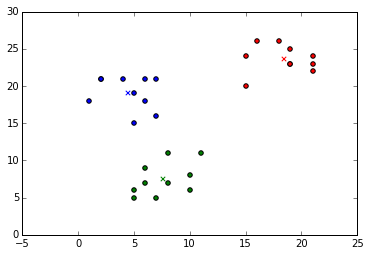

In [3]:
ck = createClusters(k,points,chooseCentroids(k,points),14)
print(ck)
clrs = 'rgbyp'

for i,k in enumerate(ck):
    plt.scatter(k[0],k[1],c=clrs[i],marker='x')
    plt.scatter([x[0] for x in ck[k]],[x[1] for x in ck[k]],c=clrs[i],marker='o')

plt.show()


## Or from SciKit Learn

/Users/Grant/Documents/2015_Fall/machine_learning/jupyter/lib/python3.4/site-packages/sklearn/cluster/k_means_.py:862: RuntimeWarning: Got data type int64, converted to float to avoid overflows
  X = self._check_test_data(X)


array([1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0,
       2, 1, 0, 2, 1, 0, 2], dtype=int32)

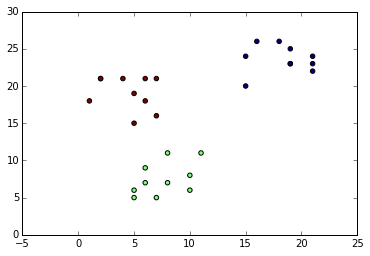

In [4]:
from sklearn.cluster import KMeans
kmm = KMeans(3,n_init=30)
kmm.fit(points)
kmm_label = kmm.predict(points)
plt.scatter([x[0] for x in points], [x[1] for x in points], c=kmm_label)
kmm_label

## Two projects

1.  Try the hand coded algorithm on the iris data.  Compare and figure out how well it clusters the different varieties of iris into the correct cluster.
2.  In image processing

    1.  Choose an image
    2.  Apply KMeans clustering to the color tuples
    3.  display the original image
    4.  create a new image using the centroids to stand in for the colors you chose.


# Iris Data

### Professor Miller's Algorithim

In [5]:
#Iris Data
import pandas as pd
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris.data
Y = iris.target

In [6]:
new = []
for i in list(X):
    x = float(i[0])
    y = float(i[1])
    w = float(i[2])
    z = float(i[3])
    new.append((x,y,w,z))
    
X = new

ck = createClusters(3,X,chooseCentroids(3,X),14)

def convert(lst):
    return (float(lst[0]),float(lst[1]),float(lst[2]),float(lst[3]))

s = {}
c = 0
for i in ck:
    s[i] = c
    c += 1
    
answers = []
for x in X:
    for i in ck:    
        if convert(x) in ck[i]:
            answers.append(s[i])
            
print("Found Groups")
print(np.array(answers))
print()
print("Actual Categories")
print(Y)

[(5.1, 3.5, 1.4, 0.3), (5.1, 3.8, 1.5, 0.3), (5.5, 2.5, 4.0, 1.3)]
Found Groups
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0
 0 1]

Actual Categories
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


It appears that the algorithim is able to identify with 100% accuracy the first group, but then has trouble distinguishing between the other two.  The above list is the calculated groups, and the bottom one is the actual groups they are a part of.  The exact numbers do not matter, they just identify that they are in different groups.

In [7]:
c1 = 0
c2 = 0
c3 = 0

for x in answers:
    if x == 0:
        c1 += 1
    if x == 1:
        c2 += 1
    if x == 2:
        c3 += 1
    
print(c1,c2,c3)

48 52 50


It appears to have said there were about 50 in each group, which is true, however when looking at the two groups it mixes up, even though it is getting close to 50, it looks as to though it is getting many wrong.

### SKLearn Algorithim

In [8]:
iris = datasets.load_iris()
X = iris.data
Y = iris.target

kmm = KMeans(3,n_init=30)
kmm.fit(X)
kmm_label = kmm.predict(X)
print("Clustered Groups")
print(kmm_label)
print()
print("Actual Groups From Data")
print(Y)

Clustered Groups
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]

Actual Groups From Data
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Much like before, it appears that the algorithim is able to identify with 100% accuracy the first group, but then has trouble distinguishing between the other two.  The above list is the calculated groups, and the bottom one is the actual groups they are a part of.  The exact numbers do not matter, they just identify that they are in different groups.

In [9]:
c1 = 0
c2 = 0
c3 = 0

for x in kmm_label:
    if x == 0:
        c1 += 1
    if x == 1:
        c2 += 1
    if x == 2:
        c3 += 1
    
print(c1,c2,c3)

62 50 38


This one appears to get the amount in each group more wrong, however it seems to do better distingishing between the two groups.

### Look at only the two problem groups

In [10]:
iris = datasets.load_iris()
X = iris.data[50:]
Y = iris.target

kmm = KMeans(2,n_init=30)
kmm.fit(X)
kmm_label = kmm.predict(X)
print("Clustered Groups")
print(kmm_label)
print()
print("Actual Groups From Data")
print(Y[50:])

Clustered Groups
[1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 1
 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1]

Actual Groups From Data
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


It seems to do fairly well when only given these two groups. But once again it is not perfect.  But it is interesting to see that it is able to take the data and identify the different groups, not knowing which one is which, and be for the most part fairly accurate.

# Image Processing

(427, 640, 4)



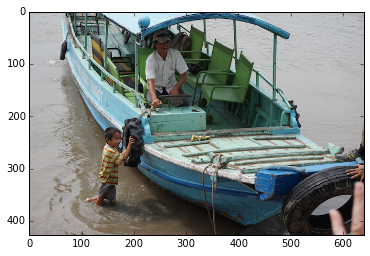

In [11]:
from PIL import Image
import copy
im = Image.open('delta.png')

pixels = list(im.getdata())
data = np.array(im)
print(data.shape)
x = data.reshape(427*640,4)
print()
y = x.reshape(427,640,4)
im = Image.fromarray(y)
plt.imshow(im)

#width, height = im.size
#pixels = [pixels[i * width:(i + 1) * width] for i in xrange(height)]

### Group into 256 different colors

/Users/Grant/Documents/2015_Fall/machine_learning/jupyter/lib/python3.4/site-packages/sklearn/cluster/k_means_.py:862: RuntimeWarning: Got data type uint8, converted to float to avoid overflows
  X = self._check_test_data(X)


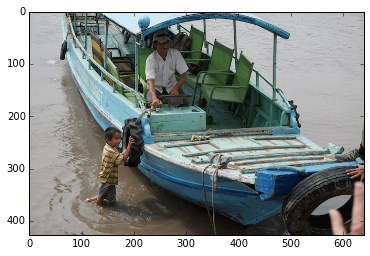

In [12]:
kmm = KMeans(256,n_init=1)
kmm.fit(x)
kmm_label = kmm.predict(x)

centroids = kmm.cluster_centers_

X = copy.copy(x)
for val in range(len(kmm_label)):
    n = list(centroids[kmm_label[val]])
    for i in range(len(n)):
        n[i] = int(float(n[i]))
    X[val] = n

y = X.reshape(427,640,4)
newim = Image.fromarray(y)
plt.imshow(newim)
newim.save("best.jpg","JPEG")

The picture above appears to be identical to original.  Only when opened in a seperate viewing program and flipped between really fast can you see the subtle differences.

### Now do the same thing but with only 2 color groups

/Users/Grant/Documents/2015_Fall/machine_learning/jupyter/lib/python3.4/site-packages/sklearn/cluster/k_means_.py:862: RuntimeWarning: Got data type uint8, converted to float to avoid overflows
  X = self._check_test_data(X)


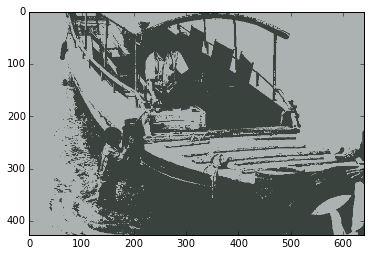

In [13]:

kmm = KMeans(2,n_init=1)
kmm.fit(x)
kmm_label = kmm.predict(x)

centroids = kmm.cluster_centers_

X = copy.copy(x)
for val in range(len(kmm_label)):
    n = list(centroids[kmm_label[val]])
    for i in range(len(n)):
        n[i] = int(float(n[i]))
    X[val] = n
    
y = X.reshape(427,640,4)
newim = Image.fromarray(y)
plt.imshow(newim)
newim.save("2.jpg","JPEG")

### 4 cluster groups

/Users/Grant/Documents/2015_Fall/machine_learning/jupyter/lib/python3.4/site-packages/sklearn/cluster/k_means_.py:862: RuntimeWarning: Got data type uint8, converted to float to avoid overflows
  X = self._check_test_data(X)


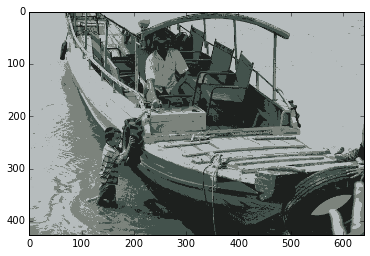

In [14]:
kmm = KMeans(4,n_init=1)
kmm.fit(x)
kmm_label = kmm.predict(x)

centroids = kmm.cluster_centers_

X = copy.copy(x)
for val in range(len(kmm_label)):
    n = list(centroids[kmm_label[val]])
    for i in range(len(n)):
        n[i] = int(float(n[i]))
    X[val] = n
    
y = X.reshape(427,640,4)
newim = Image.fromarray(y)
plt.imshow(newim)
newim.save("4.jpg","JPEG")

### 10 Cluster Groups

/Users/Grant/Documents/2015_Fall/machine_learning/jupyter/lib/python3.4/site-packages/sklearn/cluster/k_means_.py:862: RuntimeWarning: Got data type uint8, converted to float to avoid overflows
  X = self._check_test_data(X)


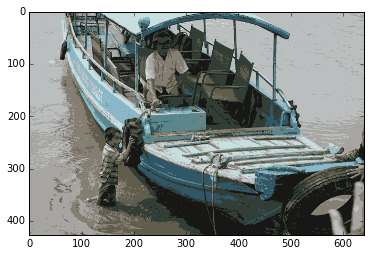

In [15]:
kmm = KMeans(10,n_init=1)
kmm.fit(x)
kmm_label = kmm.predict(x)

centroids = kmm.cluster_centers_

X = copy.copy(x)
for val in range(len(kmm_label)):
    n = list(centroids[kmm_label[val]])
    for i in range(len(n)):
        n[i] = int(float(n[i]))
    X[val] = n
    
y = X.reshape(427,640,4)
newim = Image.fromarray(y)
plt.imshow(newim)
newim.save("10.jpg","JPEG")

### 20 Cluster Groups

/Users/Grant/Documents/2015_Fall/machine_learning/jupyter/lib/python3.4/site-packages/sklearn/cluster/k_means_.py:862: RuntimeWarning: Got data type uint8, converted to float to avoid overflows
  X = self._check_test_data(X)


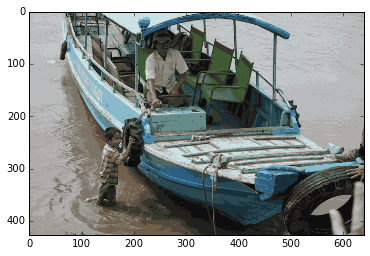

In [16]:
kmm = KMeans(20,n_init=1)
kmm.fit(x)
kmm_label = kmm.predict(x)

centroids = kmm.cluster_centers_

X = copy.copy(x)
for val in range(len(kmm_label)):
    n = list(centroids[kmm_label[val]])
    for i in range(len(n)):
        n[i] = int(float(n[i]))
    X[val] = n
    
y = X.reshape(427,640,4)
newim = Image.fromarray(y)
plt.imshow(newim)
newim.save("20.jpg","JPEG")

### 100 Cluster Groups

/Users/Grant/Documents/2015_Fall/machine_learning/jupyter/lib/python3.4/site-packages/sklearn/cluster/k_means_.py:862: RuntimeWarning: Got data type uint8, converted to float to avoid overflows
  X = self._check_test_data(X)


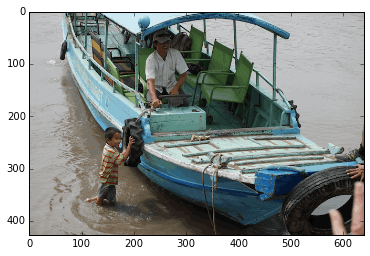

In [17]:
kmm = KMeans(100,n_init=1)
kmm.fit(x)
kmm_label = kmm.predict(x)

centroids = kmm.cluster_centers_

X = copy.copy(x)
for val in range(len(kmm_label)):
    n = list(centroids[kmm_label[val]])
    for i in range(len(n)):
        n[i] = int(float(n[i]))
    X[val] = n
    
y = X.reshape(427,640,4)
newim = Image.fromarray(y)
plt.imshow(newim)
newim.save("100.jpg","JPEG")

I am surprised by how well it is doing.  At 100 different cluster groups the picture already looks nearly like the original.  Overall it does a great job at categorizing the colors.

# Using Farmall Super H Picture

#### Original Picture

(2448, 3264, 3)


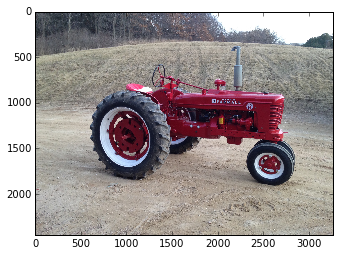

In [18]:
im = Image.open('farmall.jpg')

pixels = list(im.getdata())
data = np.array(im)
print(data.shape)
x = data.reshape(2448*3264,3)
y = x.reshape(2448,3264,3)
im = Image.fromarray(y)
plt.imshow(im)

### Using 2 color clustering

/Users/Grant/Documents/2015_Fall/machine_learning/jupyter/lib/python3.4/site-packages/sklearn/cluster/k_means_.py:862: RuntimeWarning: Got data type uint8, converted to float to avoid overflows
  X = self._check_test_data(X)


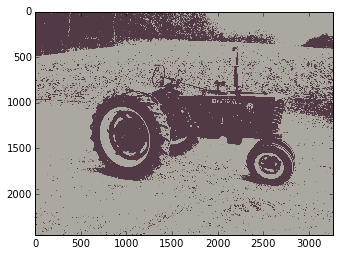

In [19]:
kmm = KMeans(2,n_init=1)
kmm.fit(x)
kmm_label = kmm.predict(x)

centroids = kmm.cluster_centers_

X = copy.copy(x)
for val in range(len(kmm_label)):
    n = list(centroids[kmm_label[val]])
    for i in range(len(n)):
        n[i] = int(float(n[i]))
    X[val] = n

y = X.reshape(2448,3264,3)
newim = Image.fromarray(y)
plt.imshow(newim)
newim.save("farmall2.jpg","JPEG")

### Using 3 color clustering

/Users/Grant/Documents/2015_Fall/machine_learning/jupyter/lib/python3.4/site-packages/sklearn/cluster/k_means_.py:862: RuntimeWarning: Got data type uint8, converted to float to avoid overflows
  X = self._check_test_data(X)


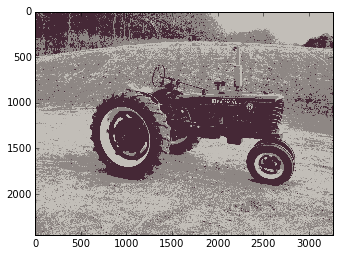

In [20]:
kmm = KMeans(3,n_init=1)
kmm.fit(x)
kmm_label = kmm.predict(x)

centroids = kmm.cluster_centers_

X = copy.copy(x)
for val in range(len(kmm_label)):
    n = list(centroids[kmm_label[val]])
    for i in range(len(n)):
        n[i] = int(float(n[i]))
    X[val] = n

y = X.reshape(2448,3264,3)
newim = Image.fromarray(y)
plt.imshow(newim)
newim.save("farmall3.jpg","JPEG")

### Using 5 color clustering

/Users/Grant/Documents/2015_Fall/machine_learning/jupyter/lib/python3.4/site-packages/sklearn/cluster/k_means_.py:862: RuntimeWarning: Got data type uint8, converted to float to avoid overflows
  X = self._check_test_data(X)


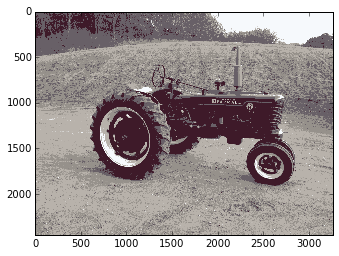

In [21]:
kmm = KMeans(5,n_init=1)
kmm.fit(x)
kmm_label = kmm.predict(x)

centroids = kmm.cluster_centers_

X = copy.copy(x)
for val in range(len(kmm_label)):
    n = list(centroids[kmm_label[val]])
    for i in range(len(n)):
        n[i] = int(float(n[i]))
    X[val] = n

y = X.reshape(2448,3264,3)
newim = Image.fromarray(y)
plt.imshow(newim)
newim.save("farmall5.jpg","JPEG")

### Using 10 color clustering

/Users/Grant/Documents/2015_Fall/machine_learning/jupyter/lib/python3.4/site-packages/sklearn/cluster/k_means_.py:862: RuntimeWarning: Got data type uint8, converted to float to avoid overflows
  X = self._check_test_data(X)


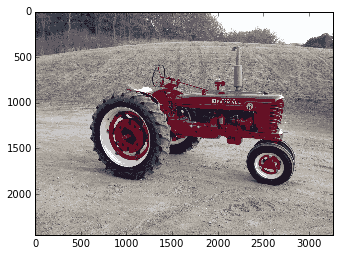

In [22]:
kmm = KMeans(10,n_init=1)
kmm.fit(x)
kmm_label = kmm.predict(x)

centroids = kmm.cluster_centers_

X = copy.copy(x)
for val in range(len(kmm_label)):
    n = list(centroids[kmm_label[val]])
    for i in range(len(n)):
        n[i] = int(float(n[i]))
    X[val] = n

y = X.reshape(2448,3264,3)
newim = Image.fromarray(y)
plt.imshow(newim)
newim.save("farmall10.jpg","JPEG")

### Using 25 color clustering

/Users/Grant/Documents/2015_Fall/machine_learning/jupyter/lib/python3.4/site-packages/sklearn/cluster/k_means_.py:862: RuntimeWarning: Got data type uint8, converted to float to avoid overflows
  X = self._check_test_data(X)


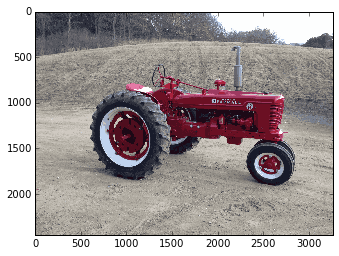

In [ ]:
kmm = KMeans(25,n_init=1)
kmm.fit(x)
kmm_label = kmm.predict(x)

centroids = kmm.cluster_centers_

X = copy.copy(x)
for val in range(len(kmm_label)):
    n = list(centroids[kmm_label[val]])
    for i in range(len(n)):
        n[i] = int(float(n[i]))
    X[val] = n

y = X.reshape(2448,3264,3)
newim = Image.fromarray(y)
plt.imshow(newim)
newim.save("farmall25.jpg","JPEG")